In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_paths = pd.read_csv('out_repo/vehicle_paths.csv')

In [58]:
df_paths.Num_Passengers.value_counts()

4    1614956
3     549930
2     235429
1     130637
0     112479
Name: Num_Passengers, dtype: int64

In [16]:
df_paths['Date'] = df_paths['Timestamp'].map(lambda x: datetime.utcfromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'))

In [19]:
df_paths.head()

,Timestamp,Vehicle_ID,Latitude,Longitude,Num_Passengers,Date
0,1380949230,137,40.73467,-73.99459,0,2013-10-05 05:00:30
1,1380949230,321,40.78573,-73.97644,0,2013-10-05 05:00:30
2,1380949230,428,40.78154,-73.96041,0,2013-10-05 05:00:30
3,1380949231,148,40.73478,-73.99871,0,2013-10-05 05:00:31
4,1380949231,148,40.73478,-73.99871,0,2013-10-05 05:00:31


In [52]:
df_events = pd.read_csv('out_repo/vehicle_events.csv')
#df_events = df_events[['Timestamp','Vehicle_ID','Stop_Intersection']]

In [48]:
df_events.head()

,Timestamp,Vehicle_ID,Stop_Intersection,Stop_Passengers,Requested_Stop_Intersection
0,1380949230,137,1116,1,NaN
1,1380949230,321,707,1,NaN
2,1380949230,428,2818,1,NaN
3,1380949240,148,3132,1,NaN
4,1380949240,343,1738,1,NaN


In [39]:
df_merge = df_paths.merge(df_events,on=['Timestamp','Vehicle_ID'],how='left')

In [40]:
df_merge.head()

,Timestamp,Vehicle_ID,Latitude,Longitude,Num_Passengers,Date,Stop_Intersection
0,1380949230,137,40.73467,-73.99459,0,2013-10-05 05:00:30,1116.0
1,1380949230,321,40.78573,-73.97644,0,2013-10-05 05:00:30,707.0
2,1380949230,428,40.78154,-73.96041,0,2013-10-05 05:00:30,2818.0
3,1380949231,148,40.73478,-73.99871,0,2013-10-05 05:00:31,NaN
4,1380949231,148,40.73478,-73.99871,0,2013-10-05 05:00:31,NaN


In [3]:
res = df_paths[['Vehicle_ID','Num_Passengers']].groupby('Vehicle_ID').mean()

In [4]:
res = res.sort_values(by=['Num_Passengers'],ascending=False).reset_index()

Text(0.5, 1.0, 'Average Number of passengers per Vehicle')

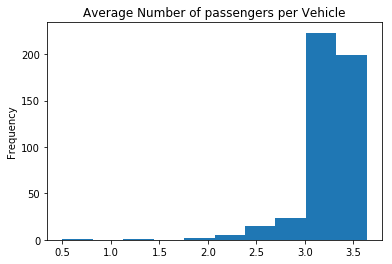

In [6]:
res.Num_Passengers.plot(kind='hist')
plt.title('Average Number of passengers per Vehicle')

In [63]:
list_id = list(res[res['Num_Passengers']>=3.5].Vehicle_ID)

In [66]:
df_short = df_paths[df_paths['Vehicle_ID'].isin(list_id)]

In [69]:
df_short.to_csv('vehicle_paths_short.csv')

In [70]:
df_short.head()

,Timestamp,Vehicle_ID,Latitude,Longitude,Num_Passengers
1,1380949200,89,40.71429,-74.01153,0
11,1380949200,267,40.75964,-73.97206,0
18,1380949200,388,40.75582,-73.97074,0
79,1380949231,55,40.78391,-73.95030,0
113,1380949241,419,40.70906,-74.01696,0
